In [10]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [11]:
def plot_file(fname):
    i = 0
    with open(fname, "r") as input:
        for line in input:
            if not re.search('[a-zA-Z]', line):
                df.loc[i] = line.split()
                i = i + 1


In [12]:
df = pd.read_table("bench-ng-depth.csv", sep=(","))

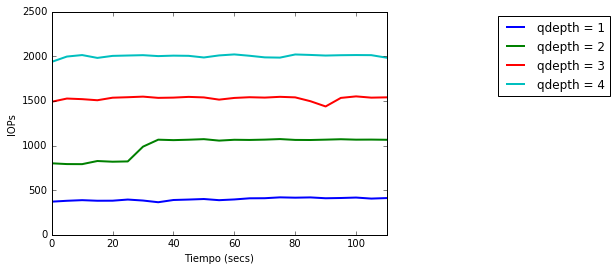

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
width64 = df[df['width'] == 1]
width128 = df[df['width'] == 2]
width256 = df[df['width'] == 3]
width512 = df[df['width'] == 4]

ax.plot(range(0, len(width64['avg_iops'])*5, 5), width64['avg_iops'], linewidth=2.0, label="qdepth = 1")
ax.plot(range(0, len(width128['avg_iops'])*5, 5), width128['avg_iops'], linewidth=2.0, label="qdepth = 2")
ax.plot(range(0, len(width256['avg_iops'])*5, 5), width256['avg_iops'], linewidth=2.0, label="qdepth = 3")
ax.plot(range(0, len(width512['avg_iops'])*5, 5), width512['avg_iops'], linewidth=2.0, label="qdepth = 4")

ax.set_xlim(0, 110)
ax.set_ylabel("IOPs")
ax.set_xlabel("Tiempo (secs)")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))

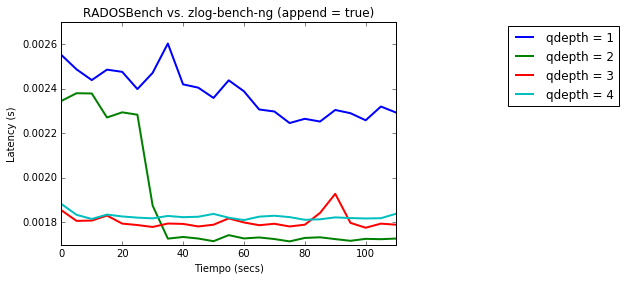

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.read_table("bench-ng-depth.csv", sep=(","))
width64 = df[df['width'] == 1]
width128 = df[df['width'] == 2]
width256 = df[df['width'] == 3]
width512 = df[df['width'] == 4]
ax.plot(range(0, len(width64['avg_lat'])*5, 5), width64['avg_lat']/1000, linewidth=2.0, label="qdepth = 1")
ax.plot(range(0, len(width128['avg_lat'])*5, 5), width128['avg_lat']/1000, linewidth=2.0, label="qdepth = 2")
ax.plot(range(0, len(width256['avg_lat'])*5, 5), width256['avg_lat']/1000, linewidth=2.0, label="qdepth = 3")
ax.plot(range(0, len(width512['avg_lat'])*5, 5), width512['avg_lat']/1000, linewidth=2.0, label="qdepth = 4")

df = pd.DataFrame(columns=("sec", "Cur ops", "started", "finished", "avg MB/s", "cur MB/s", "last lat(s)", "avg lat(s)"))
plot_file("../results-old/radosbench-cluster-default")
#ax.plot(df['avg lat(s)'], markersize=10, linewidth=2.0, label="rados bench 120 write")

ax.set_xlim(0, 110)
ax.set_ylabel("Latency (s)")
ax.set_xlabel("Tiempo (secs)")
ax.set_title("RADOSBench vs. zlog-bench-ng (append = true)")
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))